## Source

Based on Chapters 3 and 4 of the *GIZ 2022 Uganda Transport Sector Mitigation* report and the *National Integrated Transport Master Plan (NITMP) 2021–2040* recommendations, here is a reasoned allocation of the mode shares across your variables. The documents provide qualitative direction—e.g., promoting public transport and rail, phasing out low-capacity vehicles, and enhancing multimodal freight. While exact numerical shares are not specified, we can use these priorities to construct a plausible future-oriented baseline.

---

###  Freight Mode Shares (must sum to 1)

| Variable                                        | Description          | Qualitative Insight                                             | Assumed Share |
| ----------------------------------------------- | -------------------- | --------------------------------------------------------------- | ------------- |
| `frac_trns_mtkm_dem_freight_aviation`           | Freight aviation     | Minimal; not a focus                                            | **0.01**      |
| `frac_trns_mtkm_dem_freight_rail_freight`       | Freight rail         | Strong emphasis on corridors like Kampala–Kenya and Tororo–Gulu | **0.30**      |
| `frac_trns_mtkm_dem_freight_road_heavy_freight` | Road freight         | Still dominant but future shift to rail/water                   | **0.55**      |
| `frac_trns_mtkm_dem_freight_water_borne`        | Inland water freight | Revived Port Bell–Mwanza route; Bukasa Port emphasized          | **0.14**      |

---

###  Passenger Mode Shares – Private & Public (must sum to 1)

| Variable                                             | Description                        | Qualitative Insight                          | Assumed Share |
| ---------------------------------------------------- | ---------------------------------- | -------------------------------------------- | ------------- |
| `frac_trns_pkm_dem_private_and_public_human_powered` | Walking/cycling                    | Still substantial in urban areas             | **0.20**      |
| `frac_trns_pkm_dem_private_and_public_powered_bikes` | Boda bodas, e-bikes                | Being phased out, but still present          | **0.10**      |
| `frac_trns_pkm_dem_private_and_public_public`        | Public transport (buses, LRT, BRT) | Promoted as replacement for informal transit | **0.35**      |
| `frac_trns_pkm_dem_private_and_public_road_light`    | Private vehicles, cars             | Still significant, though not promoted       | **0.30**      |
| `frac_trns_pkm_dem_private_and_public_water_borne`   | Urban ferries, lake crossings      | Minor mode                                   | **0.05**      |

---

###  Regional Passenger Mode Shares (must sum to 1)

| Variable                                         | Description                        | Qualitative Insight                     | Assumed Share |
| ------------------------------------------------ | ---------------------------------- | --------------------------------------- | ------------- |
| `frac_trns_pkm_dem_regional_aviation`            | Regional flights                   | Used for isolated areas; not core focus | **0.05**      |
| `frac_trns_pkm_dem_regional_rail_passenger`      | Long-distance passenger rail       | Promoted in GKMA and to Kenya           | **0.30**      |
| `frac_trns_pkm_dem_regional_road_heavy_regional` | Regional buses                     | Expected to remain essential            | **0.55**      |
| `frac_trns_pkm_dem_regional_road_light`          | Light vehicles over long distances | Used in peri-urban areas                | **0.07**      |
| `frac_trns_pkm_dem_regional_water_borne`         | Inter-district lake transport      | Minor but growing                       | **0.03**      |

---

These allocations reflect qualitative shifts in policy direction as presented in the referenced documents. They can serve as inputs for a baseline scenario in a modeling framework, and you can later adjust them depending on specific scenarios (e.g., high-rail investment, electrification push, informal mode bans).


In [1]:
import numpy as np
import pandas as pd
import os
from utils.utils import EDAUtils, TransportUtils, GeneralUtils

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
edau = EDAUtils()
tu = TransportUtils()
gu = GeneralUtils()

In [4]:
# Set up paths
CURRENT_DIR_PATH = os.getcwd()
OUTPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "output_data")
INPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "input_data")

In [5]:
# Define projection years
years = np.arange(2020, 2051)


# Define baseline shares (2020 or 2022)
baseline_freight = {
    'aviation': 0.01,
    'rail_freight': 0.30,
    'road_heavy_freight': 0.55,
    'water_borne': 0.14
}

baseline_passenger_public_private = {
    'human_powered': 0.20,
    'powered_bikes': 0.10,
    'public': 0.35,
    'road_light': 0.30,
    'water_borne': 0.05
}

baseline_passenger_regional = {
    'aviation': 0.05,
    'rail_passenger': 0.30,
    'road_heavy_regional': 0.55,
    'road_light': 0.07,
    'water_borne': 0.03
}

# Define 2050 target shares based on document direction
target_freight = {
    'aviation': 0.01,
    'rail_freight': 0.45,
    'road_heavy_freight': 0.40,
    'water_borne': 0.14
}

target_passenger_public_private = {
    'human_powered': 0.15,
    'powered_bikes': 0.05,
    'public': 0.50,
    'road_light': 0.25,
    'water_borne': 0.05
}

target_passenger_regional = {
    'aviation': 0.03,
    'rail_passenger': 0.45,
    'road_heavy_regional': 0.45,
    'road_light': 0.05,
    'water_borne': 0.02
}

In [6]:
# Function to interpolate shares and include years as a column
def interpolate_shares(start, end, years):
    df = pd.DataFrame({mode: np.linspace(start[mode], end[mode], len(years)) for mode in start})
    df["year"] = years
    return df

# Interpolated projections
freight_df = interpolate_shares(baseline_freight, target_freight, years)
passenger_public_private_df = interpolate_shares(baseline_passenger_public_private, target_passenger_public_private, years)
passenger_regional_df = interpolate_shares(baseline_passenger_regional, target_passenger_regional, years)

# Add prefixes
freight_df.columns = [f"frac_trns_mtkm_dem_freight_{col}" if col != "year" else "year" for col in freight_df.columns]
passenger_public_private_df.columns = [f"frac_trns_pkm_dem_private_and_public_{col}" if col != "year" else "year" for col in passenger_public_private_df.columns]
passenger_regional_df.columns = [f"frac_trns_pkm_dem_regional_{col}" if col != "year" else "year" for col in passenger_regional_df.columns]


In [7]:
freight_df.tail()

,frac_trns_mtkm_dem_freight_aviation,frac_trns_mtkm_dem_freight_rail_freight,frac_trns_mtkm_dem_freight_road_heavy_freight,frac_trns_mtkm_dem_freight_water_borne,year
26,0.01,0.430,0.420,0.14,2046
27,0.01,0.435,0.415,0.14,2047
28,0.01,0.440,0.410,0.14,2048
29,0.01,0.445,0.405,0.14,2049
30,0.01,0.450,0.400,0.14,2050


In [8]:
passenger_public_private_df.tail()

,frac_trns_pkm_dem_private_and_public_human_powered,frac_trns_pkm_dem_private_and_public_powered_bikes,frac_trns_pkm_dem_private_and_public_public,frac_trns_pkm_dem_private_and_public_road_light,frac_trns_pkm_dem_private_and_public_water_borne,year
26,0.156667,0.056667,0.480,0.256667,0.05,2046
27,0.155000,0.055000,0.485,0.255000,0.05,2047
28,0.153333,0.053333,0.490,0.253333,0.05,2048
29,0.151667,0.051667,0.495,0.251667,0.05,2049
30,0.150000,0.050000,0.500,0.250000,0.05,2050


In [9]:
passenger_regional_df.tail()

,frac_trns_pkm_dem_regional_aviation,frac_trns_pkm_dem_regional_rail_passenger,frac_trns_pkm_dem_regional_road_heavy_regional,frac_trns_pkm_dem_regional_road_light,frac_trns_pkm_dem_regional_water_borne,year
26,0.032667,0.430,0.463333,0.052667,0.021333,2046
27,0.032000,0.435,0.460000,0.052000,0.021000,2047
28,0.031333,0.440,0.456667,0.051333,0.020667,2048
29,0.030667,0.445,0.453333,0.050667,0.020333,2049
30,0.030000,0.450,0.450000,0.050000,0.020000,2050


In [10]:
# Extend to 2100
def extend_to_2100(df):
    last_row = df[df["year"] == 2050].iloc[0]
    extension_years = np.arange(2051, 2101)
    extension_df = pd.DataFrame([last_row] * len(extension_years))
    extension_df["year"] = extension_years
    return pd.concat([df, extension_df], ignore_index=True)

freight_df_extended = extend_to_2100(freight_df)
passenger_public_private_df_extended = extend_to_2100(passenger_public_private_df)
passenger_regional_df_extended = extend_to_2100(passenger_regional_df)


In [11]:
freight_df_extended.tail()

,frac_trns_mtkm_dem_freight_aviation,frac_trns_mtkm_dem_freight_rail_freight,frac_trns_mtkm_dem_freight_road_heavy_freight,frac_trns_mtkm_dem_freight_water_borne,year
76,0.01,0.45,0.4,0.14,2096
77,0.01,0.45,0.4,0.14,2097
78,0.01,0.45,0.4,0.14,2098
79,0.01,0.45,0.4,0.14,2099
80,0.01,0.45,0.4,0.14,2100


In [12]:
passenger_public_private_df_extended.tail()

,frac_trns_pkm_dem_private_and_public_human_powered,frac_trns_pkm_dem_private_and_public_powered_bikes,frac_trns_pkm_dem_private_and_public_public,frac_trns_pkm_dem_private_and_public_road_light,frac_trns_pkm_dem_private_and_public_water_borne,year
76,0.15,0.05,0.5,0.25,0.05,2096
77,0.15,0.05,0.5,0.25,0.05,2097
78,0.15,0.05,0.5,0.25,0.05,2098
79,0.15,0.05,0.5,0.25,0.05,2099
80,0.15,0.05,0.5,0.25,0.05,2100


In [13]:
passenger_regional_df_extended.tail()

,frac_trns_pkm_dem_regional_aviation,frac_trns_pkm_dem_regional_rail_passenger,frac_trns_pkm_dem_regional_road_heavy_regional,frac_trns_pkm_dem_regional_road_light,frac_trns_pkm_dem_regional_water_borne,year
76,0.03,0.45,0.45,0.05,0.02,2096
77,0.03,0.45,0.45,0.05,0.02,2097
78,0.03,0.45,0.45,0.05,0.02,2098
79,0.03,0.45,0.45,0.05,0.02,2099
80,0.03,0.45,0.45,0.05,0.02,2100


## Validation

In [14]:
# Check for duplicates
gu.check_duplicates(freight_df_extended)
gu.check_duplicates(passenger_public_private_df_extended)
gu.check_duplicates(passenger_regional_df_extended)

No duplicated years found in the DataFrame.
No duplicated rows found in the DataFrame.
No duplicated years found in the DataFrame.
No duplicated rows found in the DataFrame.
No duplicated years found in the DataFrame.
No duplicated rows found in the DataFrame.


In [15]:
# Check if they sum to 1
print(gu.check_row_sums_to_one(freight_df_extended))
print(gu.check_row_sums_to_one(passenger_public_private_df_extended))
print(gu.check_row_sums_to_one(passenger_regional_df_extended))

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True]), np.True_)
(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
      

In [16]:
uga_global_df = pd.read_csv(os.path.join(INPUT_DATA_DIR_PATH, "sisepuede_raw_global_inputs_uganda.csv"))
uga_global_df.head()

,frac_agrc_nuts_cl1_temperate,yf_agrc_cereals_tonne_ha,frac_agrc_rice_cl2_wet,frac_agrc_cereals_cl1_tropical,frac_agrc_tubers_cl1_tropical,pop_lvst_initial_chickens,frac_agrc_bevs_and_spices_cl2_wet,frac_agrc_tubers_cl2_wet,frac_frst_primary_cl1_temperate_nutrient_rich,frac_lndu_grasslands_cl2_dry,...,nemomod_entc_frac_min_share_production_pp_biogas,nemomod_entc_frac_min_share_production_pp_coal,nemomod_entc_frac_min_share_production_pp_coal_ccs,nemomod_entc_frac_min_share_production_pp_gas,nemomod_entc_frac_min_share_production_pp_gas_ccs,nemomod_entc_frac_min_share_production_pp_geothermal,nemomod_entc_frac_min_share_production_pp_nuclear,nemomod_entc_frac_min_share_production_pp_ocean,nemomod_entc_frac_min_share_production_pp_waste_incineration,nemomod_entc_frac_min_share_production_pp_wind
0,0.030468,1.805033,0.988021,0.969532,0.969532,46039000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.030468,1.832342,0.988021,0.969532,0.969532,46291000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.030468,1.827437,0.988021,0.969532,0.969532,47578000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.030468,1.935353,0.988021,0.969532,0.969532,48901000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.030468,2.003586,0.988021,0.969532,0.969532,43121000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Comparing frac_trns_mtkm_dem_freight_aviation...


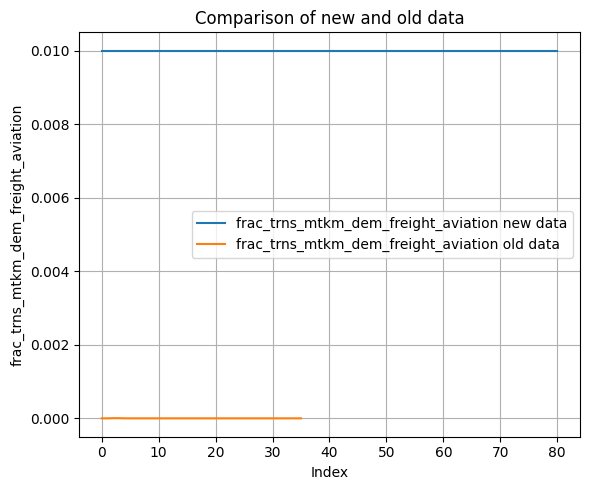

Comparing frac_trns_mtkm_dem_freight_rail_freight...


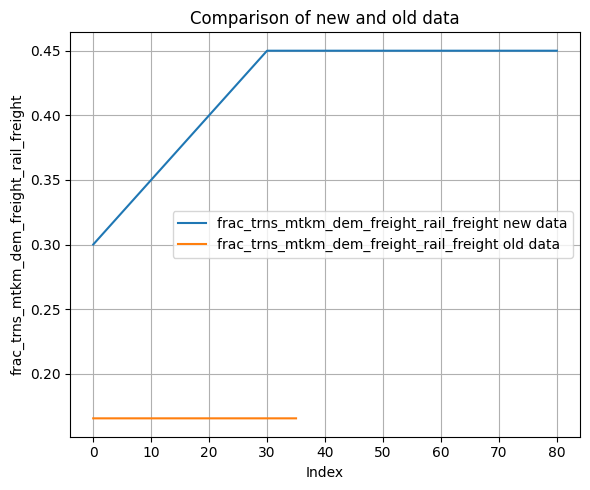

Comparing frac_trns_mtkm_dem_freight_road_heavy_freight...


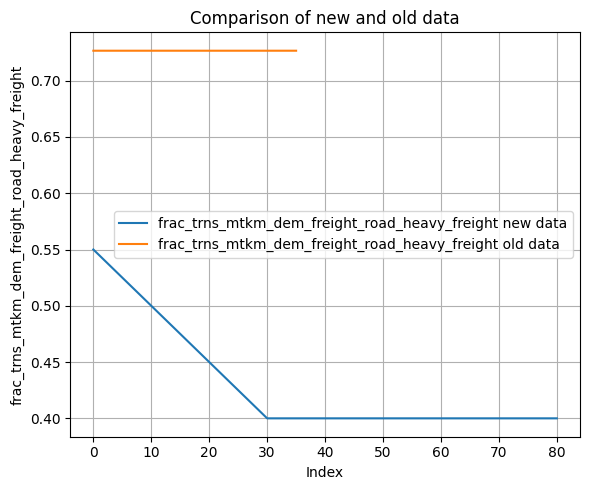

Comparing frac_trns_mtkm_dem_freight_water_borne...


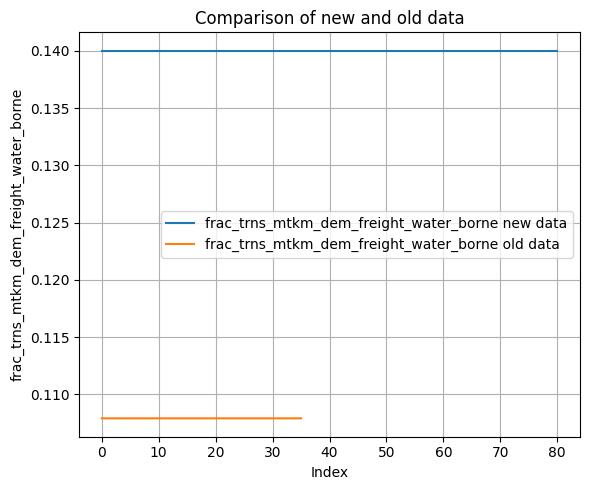

In [17]:
for col in freight_df_extended.columns:
    if col != "year":
        print(f"Comparing {col}...")
        edau.compare_variables(freight_df_extended, uga_global_df, [col])

Comparing frac_trns_pkm_dem_private_and_public_human_powered...


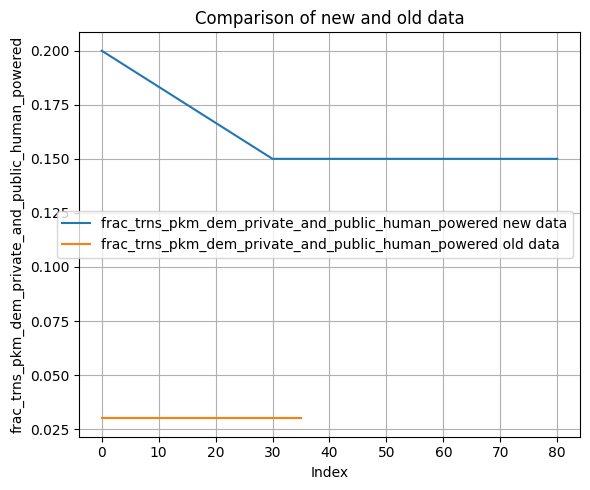

Comparing frac_trns_pkm_dem_private_and_public_powered_bikes...


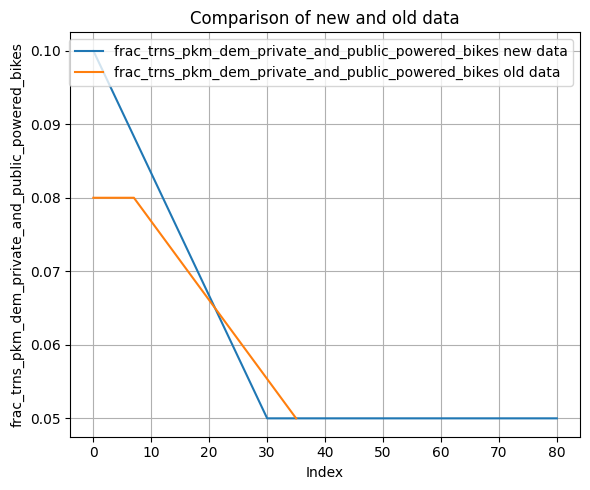

Comparing frac_trns_pkm_dem_private_and_public_public...


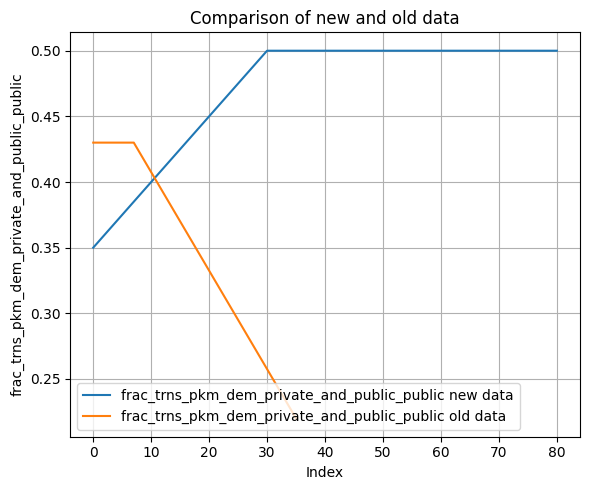

Comparing frac_trns_pkm_dem_private_and_public_road_light...


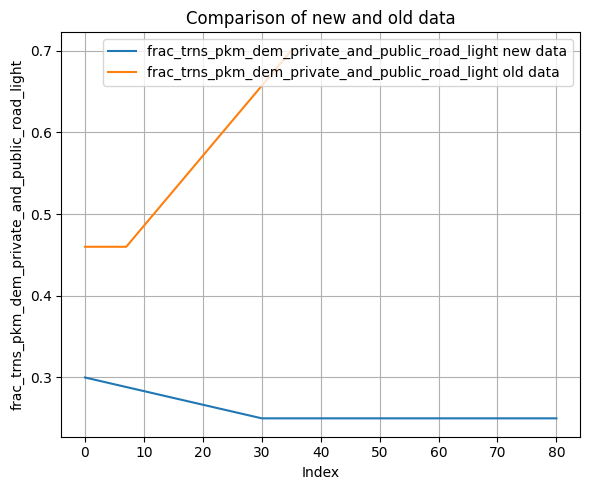

Comparing frac_trns_pkm_dem_private_and_public_water_borne...


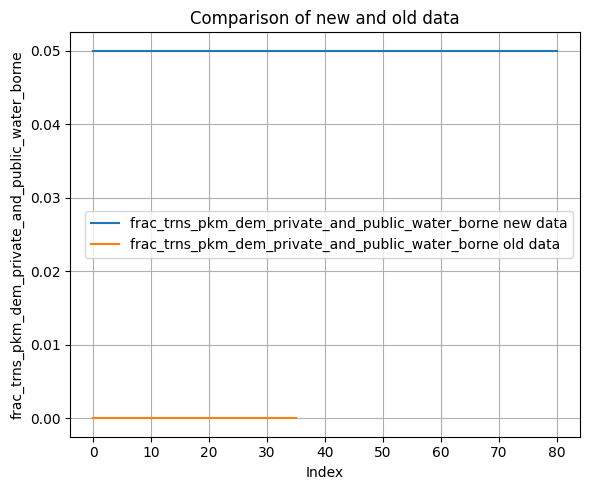

In [18]:
for col in passenger_public_private_df_extended.columns:
    if col != "year":
        print(f"Comparing {col}...")
        edau.compare_variables(passenger_public_private_df_extended, uga_global_df, [col])

Comparing frac_trns_pkm_dem_regional_aviation...


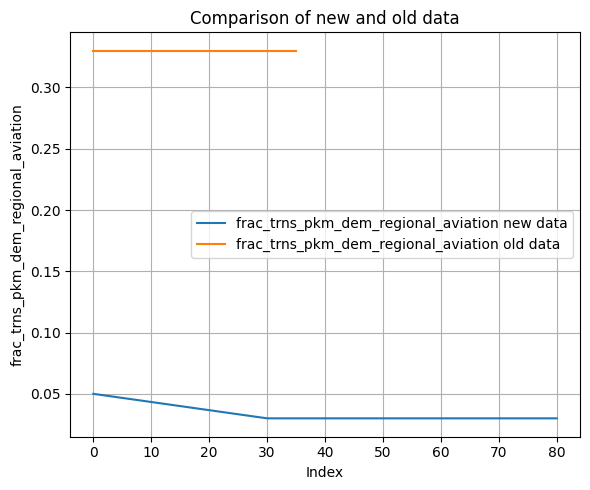

Comparing frac_trns_pkm_dem_regional_rail_passenger...


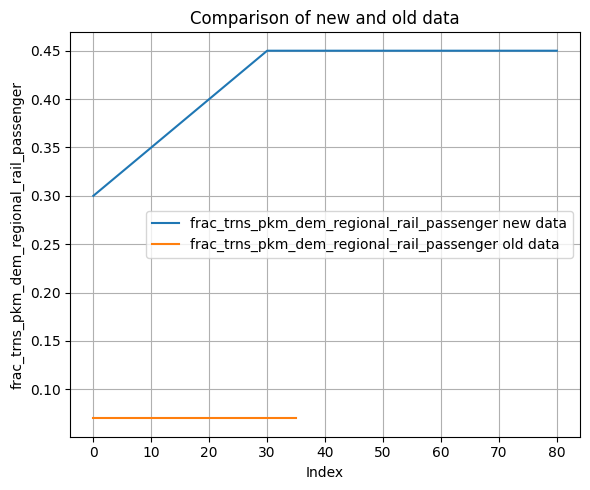

Comparing frac_trns_pkm_dem_regional_road_heavy_regional...


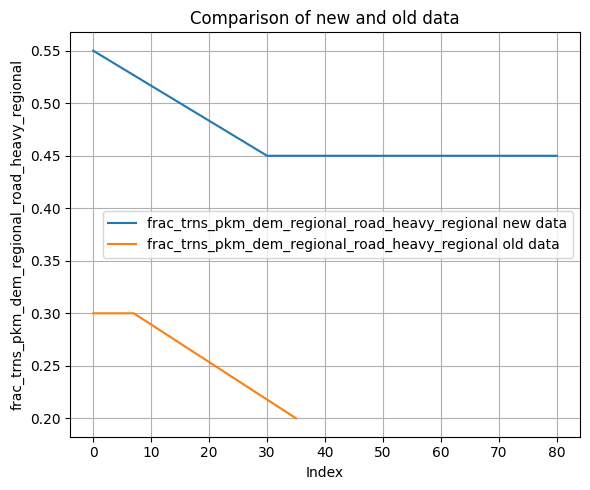

Comparing frac_trns_pkm_dem_regional_road_light...


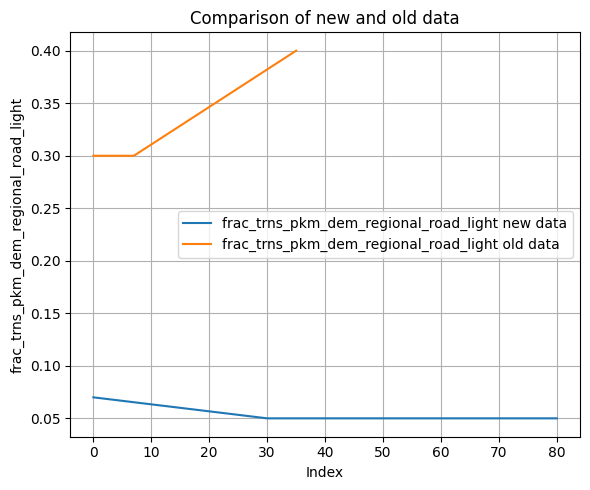

Comparing frac_trns_pkm_dem_regional_water_borne...


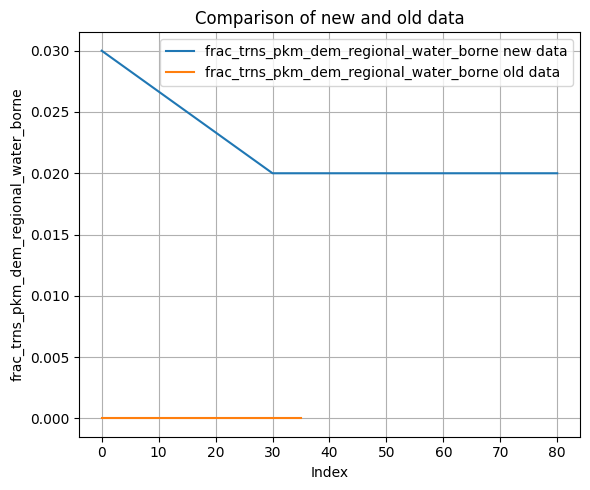

In [19]:
for col in passenger_regional_df_extended.columns:
    if col != "year":
        print(f"Comparing {col}...")
        edau.compare_variables(passenger_regional_df_extended, uga_global_df, [col])

## Save data

In [20]:
freight_df_extended.to_csv(os.path.join(OUTPUT_DATA_DIR_PATH, "frac_trns_mtkm_dem_freight.csv"), index=False)
passenger_public_private_df_extended.to_csv(os.path.join(OUTPUT_DATA_DIR_PATH, "frac_trns_pkm_dem_private_and_public.csv"), index=False)
passenger_regional_df_extended.to_csv(os.path.join(OUTPUT_DATA_DIR_PATH, "frac_trns_pkm_dem_regional.csv"), index=False)